In [1]:
import numpy as np
import qiskit

# Build assertions

# A0

In [2]:
assert0_base = qiskit.QuantumCircuit(6,5, name="assert0")
assert0_base.measure(range(5),range(5))
assert0_base.barrier(range(6))

In [3]:
assert0_cond = qiskit.QuantumCircuit.from_qasm_str("""
OPENQASM 2.0;
include "qelib1.inc";

qreg q[6]; // Quantum Register
creg c[5]; // Classical Register
 
if (c==0) x q[5]; // q[5] == 1 means assertion passed
""")

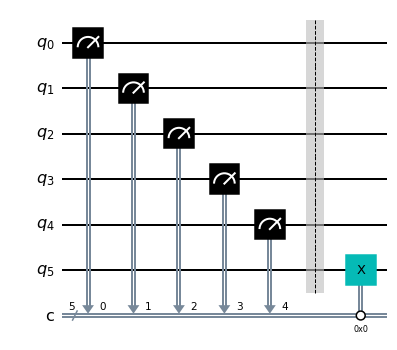

In [4]:
assert0 = assert0_base.compose(assert0_cond, range(6), front = False)
assert0.draw('mpl')

In [5]:
assert0_instr = assert0.to_instruction()

## A1

In [6]:
assert_1_base = qiskit.QuantumCircuit(4,3, name = "assert1")
assert_1_base.h(range(3))
assert_1_base.measure(range(3),range(3))
assert_1_base.barrier(range(3))
assert_1_base.h(range(3))
assert_1_base.barrier(range(4))

In [7]:
assert1_cond = qiskit.QuantumCircuit.from_qasm_str("""
OPENQASM 2.0;
include "qelib1.inc";

qreg q[4]; // Quantum Register
creg c[3]; // Classical Register
 
if (c==0) x q[3]; // q[3] == 1 means assertion passed
""")

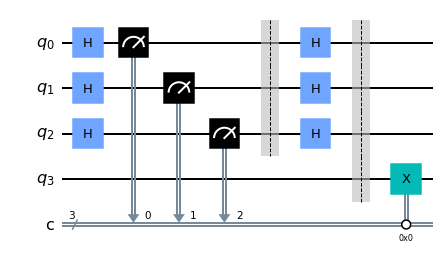

In [8]:
assert1 = assert_1_base.compose(assert1_cond, range(4), front = False)
assert1.draw('mpl')

In [9]:
assert1_instr = assert1.to_instruction()

## A2

In [10]:
assert2_base = qiskit.QuantumCircuit(4,3, name = "assert2")
assert2_base.cx(0,[2,1])
assert2_base.h(0)
assert2_base.barrier(range(3))
assert2_base.measure(range(3),range(3))
assert2_base.barrier(range(3))
assert2_base.h(0)
assert2_base.cx(0,[1,2])
assert2_base.barrier(range(4))

In [11]:
assert2_cond = qiskit.QuantumCircuit.from_qasm_str("""
OPENQASM 2.0;
include "qelib1.inc";

qreg q[4]; // Quantum Register
creg c[3]; // Classical Register
 
if (c==0) x q[3]; // q[3] == 1 means assertion passed
""")

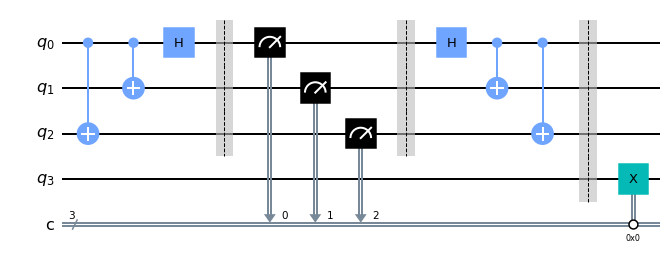

In [12]:
assert2 = assert2_base.compose(assert2_cond, range(4), front = False)
assert2.draw('mpl')

In [13]:
assert2_instr = assert2.to_instruction()

# Shor's algorithm

In [14]:
shors_full = qiskit.QuantumCircuit(9, 5, name = 'shors')

In [15]:
# shors_full.rx(0.2*np.pi, range(5))

In [16]:
shors_full.append(assert0_instr, [0,1,2,3,4,5], [0,1,2,3,4])

In [17]:
shors_full.rx(0.2*np.pi, range(5))
shors_full.h(0)
shors_full.h(1)
shors_full.h(2)

In [18]:
shors_full.append(assert1_instr, [0,1,2,6], [0,1,2])

In [19]:
shors_full.cx(2,[3,4])

In [20]:
shors_full.append(assert2_instr, [2,3,4,7], [0,1,2])

/home/dsmishler/anaconda3/lib/python3.8/site-packages/qiskit/visualization/matplotlib.py:317: RuntimeWarning: Cregbundle set to False since an instruction needs to refer to individual classical wire
  self._get_layer_widths()


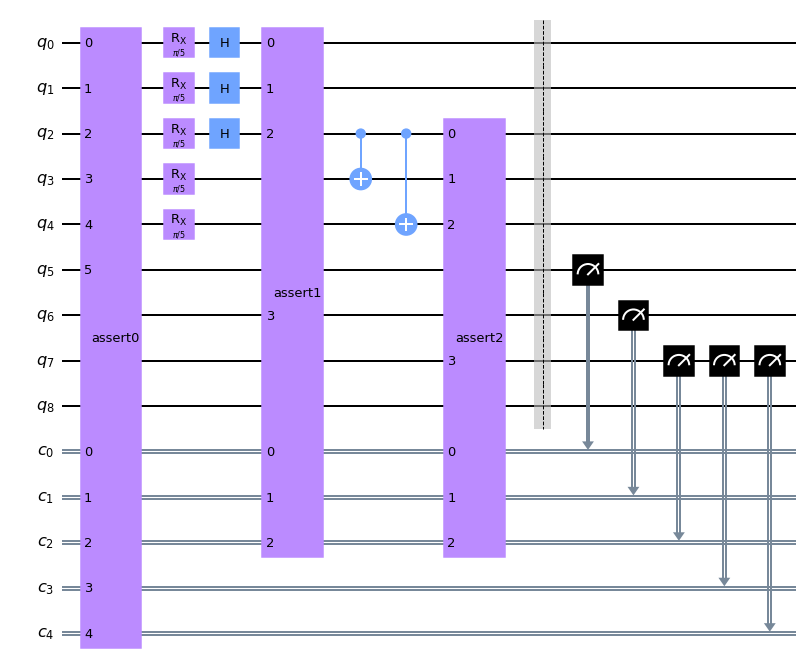

In [21]:
shors_full.barrier(range(9))
shors_full.measure(5,0)
shors_full.measure(6,1)
shors_full.measure(7,2)
shors_full.measure(7,3)
shors_full.measure(7,4)
shors_full.draw('mpl')

In [22]:
from qiskit.providers.aer import QasmSimulator

In [23]:
backend = QasmSimulator()
circ_compiled = qiskit.transpile(shors_full, backend)
job_sim = backend.run(circ_compiled, shots = 1024)
results_sim = job_sim.result()

In [24]:
counts = results_sim.get_counts(circ_compiled)
print(counts)

{'11101': 119, '00011': 157, '11111': 615, '00001': 133}


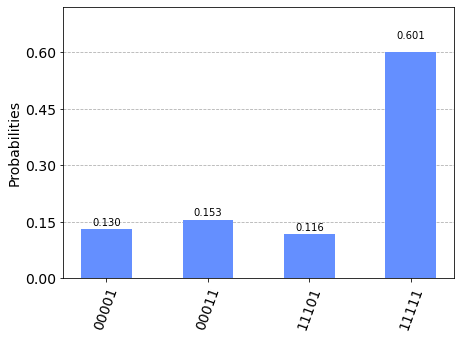

In [25]:
qiskit.visualization.plot_histogram(counts)